In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
netflix_data=pd.read_csv('netflix_content_2023.csv')

In [4]:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [5]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


In [6]:
# aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

In [7]:
content_type_viewership

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

In [8]:
# Converting grouped data to a DataFrame for Seaborn
content_type_df = content_type_viewership.reset_index()

In [9]:
content_type_df

,Content Type,Hours Viewed
0,Movie,5.063780e+10
1,Show,1.077641e+11


C:\Users\Amulya\AppData\Local\Temp\ipykernel_2896\3967355523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


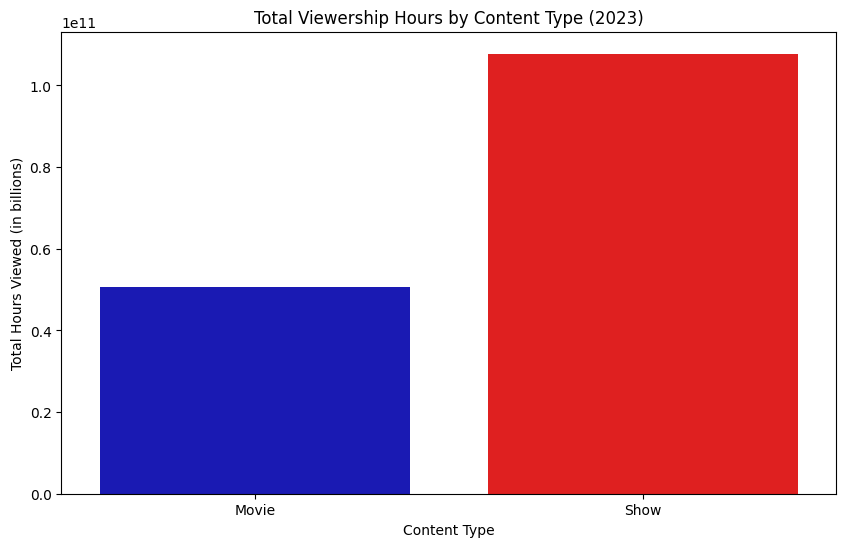

In [10]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Content Type',
    y='Hours Viewed',
    data=content_type_df,
    palette=['mediumblue', 'red']
)

# Adding titles and labels
plt.title('Total Viewership Hours by Content Type (2023)')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')

# Display the plot
plt.show()


In [11]:
# Calculate summary statistics for key numeric columns
summary_stats = netflix_data.describe()
print(summary_stats)


       Hours Viewed
count  2.481200e+04
mean   6.384084e+06
std    2.067086e+07
min    1.000000e+05
25%    3.000000e+05
50%    1.100000e+06
75%    4.700000e+06
max    8.121000e+08


In [14]:
# Identify potential outliers in viewership
q1 = netflix_data['Hours Viewed'].quantile(0.25)
q3 = netflix_data['Hours Viewed'].quantile(0.75)
iqr = q3 - q1
outliers = netflix_data[(netflix_data['Hours Viewed'] < (q1 - 1.5 * iqr)) | 
                        (netflix_data['Hours Viewed'] > (q3 + 1.5 * iqr))]
print(f"Outliers:\n{outliers}")


Outliers:
                                     Title Available Globally? Release Date  \
0                The Night Agent: Season 1                 Yes   2023-03-23   
1                Ginny & Georgia: Season 2                 Yes   2023-01-05   
2       The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                      Wednesday: Season 1                 Yes   2022-11-23   
4      Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   
...                                    ...                 ...          ...   
22464                Betty en NY: Season 1                  No          NaN   
22465      Rebelde Way (2002): Temporada 2                  No          NaN   
23291    As Aventuras de Poliana: Season 1                  No          NaN   
23292    Cúmplices de um Resgate: Season 1                  No          NaN   
23293          Pedro el escamoso: Season 1                  No          NaN   

       Hours Viewed Language Indicator Co

In [15]:
# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
language_viewership

Language Indicator
English        1.244417e+11
Korean         1.537840e+10
Non-English    1.043910e+10
Japanese       7.102000e+09
Hindi          9.261000e+08
Russian        1.146000e+08
Name: Hours Viewed, dtype: float64

In [26]:
netflix_data['Release Date'].dtype

dtype('O')

In [ ]:
netflix_data['Release Year'] = netflix_data['Release Date'].dt.year



AttributeError: Can only use .dt accessor with datetimelike values